In [1]:
%pylab inline
import h5py 
import programas as pg
import pandas as pd
import grispy as gsp

Populating the interactive namespace from numpy and matplotlib


In [2]:
field = np.load('/mnt/projects/bias_mock/rhodm_eul.npy')

In [3]:
np.min(field)

0.0

Text(0, 0.5, '$ \\rm \\delta $')

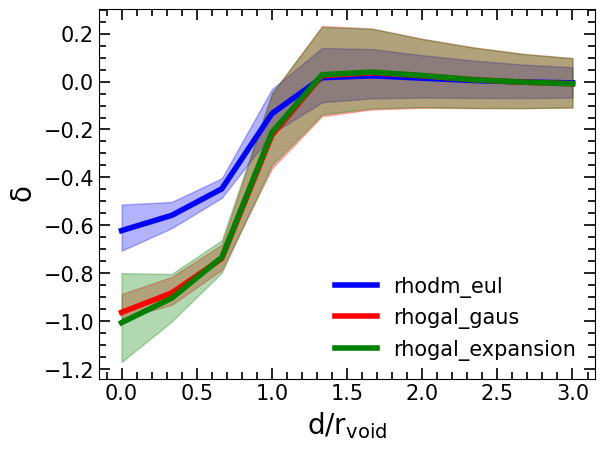

In [4]:
df = pd.read_csv('perfiles_rhodm_eul.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhodm_eul.npy')
rhomean = np.mean(field)
delta = (mediana - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='blue',lw=4,label='rhodm_eul')
plt.fill_between(dist,delta_q25,delta_q75,color='blue',alpha=.3)

df = pd.read_csv('perfiles_rhogal_eul_bias_gaus.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_gaus.npy')
rhomean = np.mean(field)
delta = (mediana - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='red',lw=4,label='rhogal_gaus')
plt.fill_between(dist,delta_q25,delta_q75,color='red',alpha=.3)

df = pd.read_csv('perfiles_rhogal_eul_bias_expansion.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_expansion.npy')
rhomean = np.mean(field)
delta = (mediana - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='green',lw=4,label='rhogal_expansion')
plt.fill_between(dist,delta_q25,delta_q75,color='green',alpha=.3)

plt.legend(frameon=False,fontsize=15,loc='lower right')
plt.tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
plt.tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
plt.tick_params(labelsize=15)
plt.minorticks_on()

plt.xlabel('$ \\rm d/r_{void} $', size=20)
plt.ylabel('$ \\rm \\delta $',size=20)

## Ahora le agrego el campo de densidad de galaxias original

In [5]:
file = h5py.File('/mnt/projects/bias_mock/galpos_RedSample.hdf5','r')
pos = file['Subhalo/SubhaloPos'][()]
v0 = np.loadtxt('sphvds_raul-0.8.dat')
centres = v0[:,2:5]

In [6]:
Lbox = 1440
grid = gsp.GriSPy(pos, N_cells=32)
periodic = {0: (0, Lbox), 1: (0, Lbox), 2: (0, Lbox)}
grid.set_periodicity(periodic, inplace=True)

In [7]:
bines = 20
rmin = 0
rmax = 3
#bineado = np.logspace(np.log10(rmin),np.log10(rmax),bines) 
bineado = np.linspace(rmin,rmax,bines)

In [8]:
npart = len(pos)
rhomean = npart/Lbox**3

In [16]:
nvoids = 17000

perfiles = np.zeros([bines-1,nvoids])
for i in range(nvoids):

    centres = v0[i,2:5]
    rvoid = v0[i,1]
    x = centres[0]
    y = centres[1]
    z = centres[2]

    perfil = pg.profile(x,y,z,rvoid,grid,bines,bineado)
    volumen = pg.profile_volume(rvoid,bines,bineado)
    
    delta = ((perfil/volumen)-rhomean)/rhomean
    
    perfiles[:,i] = delta

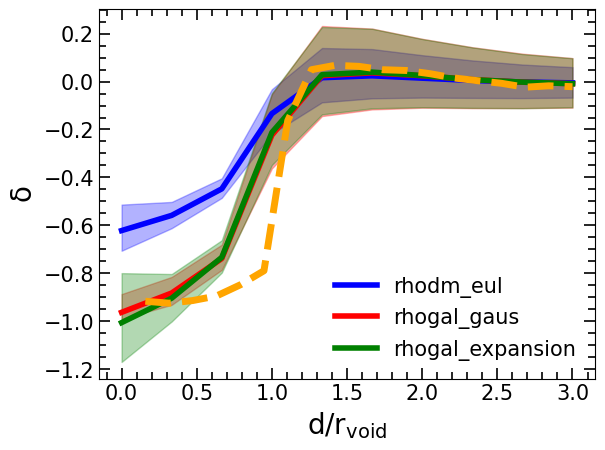

In [10]:
df = pd.read_csv('perfiles_rhodm_eul.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhodm_eul.npy')
rhomean = np.mean(field)
delta = (mediana - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='blue',lw=4,label='rhodm_eul')
plt.fill_between(dist,delta_q25,delta_q75,color='blue',alpha=.3)

df = pd.read_csv('perfiles_rhogal_eul_bias_gaus.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_gaus.npy')
rhomean = np.mean(field)
delta = (mediana - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='red',lw=4,label='rhogal_gaus')
plt.fill_between(dist,delta_q25,delta_q75,color='red',alpha=.3)

df = pd.read_csv('perfiles_rhogal_eul_bias_expansion.dat')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_expansion.npy')
rhomean = np.mean(field)
delta = (mediana - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='green',lw=4,label='rhogal_expansion')
plt.fill_between(dist,delta_q25,delta_q75,color='green',alpha=.3)

plt.legend(frameon=False,fontsize=15,loc='lower right')
plt.tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
plt.tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
plt.tick_params(labelsize=15)
plt.minorticks_on()

plt.xlabel('$ \\rm d/r_{void} $', size=20)
plt.ylabel('$ \\rm \\delta $',size=20)


plt.plot(bineado[1:],pg.mean_profile(perfiles), color='orange',lw=5, ls='--')

## Perfiles interpolados

In [4]:
file = h5py.File('/mnt/projects/bias_mock/galpos_RedSample.hdf5','r')
pos = file['Subhalo/SubhaloPos'][()]
v0 = np.loadtxt('sphvds_raul-0.8.dat')
centres = v0[:,2:5]

Lbox = 1440
grid = gsp.GriSPy(pos, N_cells=32)
periodic = {0: (0, Lbox), 1: (0, Lbox), 2: (0, Lbox)}
grid.set_periodicity(periodic, inplace=True)

In [5]:
len(v0)

19268

In [10]:
bines = 30
rmin = 0
rmax = 5
#bineado = np.logspace(np.log10(rmin),np.log10(rmax),bines) 
bineado = np.linspace(rmin,rmax,bines)

npart = len(pos)
rhomean = npart/Lbox**3

nvoids = 10000

perfiles = np.zeros([bines-1,nvoids])
for i in range(nvoids):

    centres = v0[i,2:5]
    rvoid = v0[i,1]
    x = centres[0]
    y = centres[1]
    z = centres[2]

    perfil = pg.profile(x,y,z,rvoid,grid,bines,bineado)
    volumen = pg.profile_volume(rvoid,bines,bineado)
    
    delta = ((perfil/volumen)-rhomean)/rhomean
    
    perfiles[:,i] = delta

Text(0, 0.5, '$ \\rm \\delta $')

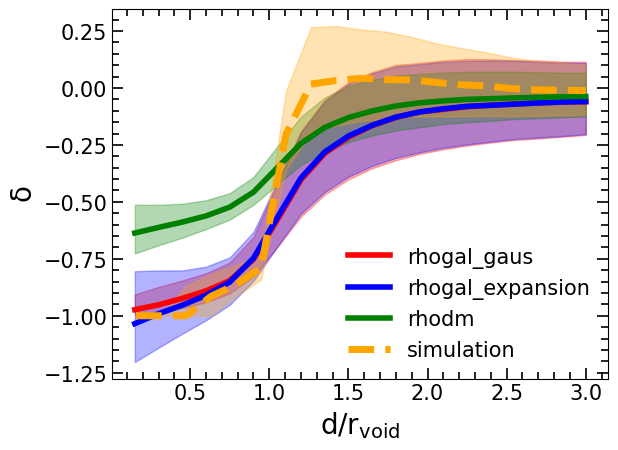

In [7]:
df = pd.read_csv('perfiles_interp_rhogal_eul_bias_gaus.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_gaus.npy')
rhomean = np.mean(field)
delta = (mediana - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='red',lw=4,label='rhogal_gaus')
plt.fill_between(dist,delta_q25,delta_q75,color='red',alpha=.3)

df = pd.read_csv('perfiles_interp_rhogal_eul_bias_expansion.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_expansion.npy')
rhomean = np.mean(field)
delta = (mediana - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='blue',lw=4,label='rhogal_expansion')
plt.fill_between(dist,delta_q25,delta_q75,color='blue',alpha=.3)

df = pd.read_csv('perfiles_interp_rhodm_eul.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhodm_eul.npy')
rhomean = np.mean(field)
delta = (mediana - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='green',lw=4,label='rhodm')
plt.fill_between(dist,delta_q25,delta_q75,color='green',alpha=.3)

median_galaxies,q1,q2 = pg.median_profile(perfiles,25,75)
plt.plot(bineado[1:],median_galaxies, color='orange',lw=5, ls='--', label='simulation')
plt.fill_between(bineado[1:],q1,q2,color='orange',alpha=.3)

plt.legend(frameon=False,fontsize=15,loc='lower right')
plt.tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
plt.tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
plt.tick_params(labelsize=15)
plt.minorticks_on()

plt.xlabel('$ \\rm d/r_{void} $', size=20)
plt.ylabel('$ \\rm \\delta $',size=20)

(0.0, 3.0)

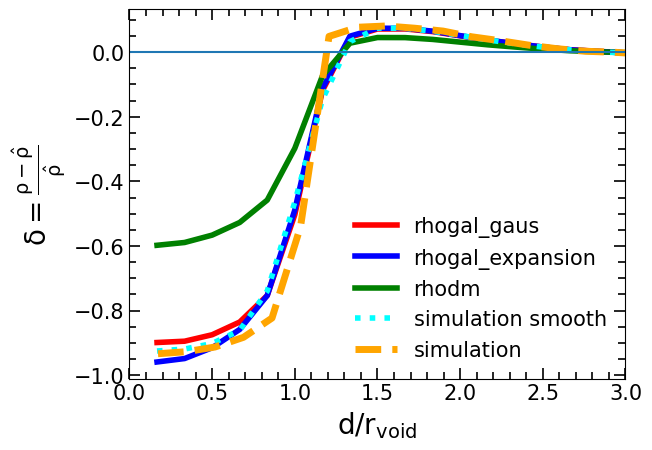

In [26]:
df = pd.read_csv('perfiles_rhogal_eul_bias_gaus_pruebas.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_gaus.npy')
rhomean = np.mean(field)
delta = (mean - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='red',lw=4,label='rhogal_gaus')
#plt.fill_between(dist,delta_q25,delta_q75,color='red',alpha=.3)

df = pd.read_csv('perfiles_rhogal_eul_bias_expansion_pruebas.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_expansion.npy')
rhomean = np.mean(field)
delta = (mean - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='blue',lw=4,label='rhogal_expansion')
#plt.fill_between(dist,delta_q25,delta_q75,color='blue',alpha=.3)

df = pd.read_csv('perfiles_rhodm_eul_pruebas.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhodm_eul.npy')
rhomean = np.mean(field)
delta = (mean - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='green',lw=4,label='rhodm')


df = pd.read_csv('perfiles_smoothed_field_mio_pruebas.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('density_field_mio.npy')
rhomean = np.mean(field)
delta = (mean - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='cyan',lw=4,label='simulation smooth',ls='dotted')

mean_galaxies = pg.mean_profile(perfiles)
plt.plot(bineado[1:],mean_galaxies, color='orange',lw=5, ls='--', label='simulation')
#plt.fill_between(bineado[1:],q1,q2,color='orange',alpha=.3)

plt.legend(frameon=False,fontsize=15,loc='lower right')
plt.tick_params('both',length=5,width=1.2,which='minor',direction='in',right='on',top='on')
plt.tick_params('both',length=8,width=1.2,which='major',direction='in',right='on',top='on')
plt.tick_params(labelsize=15)
plt.minorticks_on()

plt.xlabel('$ \\rm d/r_{void} $', size=20)
plt.ylabel('$ \\rm \\delta=\\frac{\\rho-\\hat{\\rho}}{\\hat{\\rho}} $',size=20)

plt.axhline(y = 0)

plt.xlim(0,3)

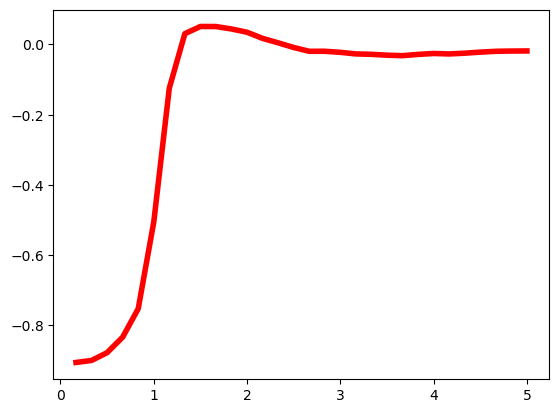

In [50]:
df = pd.read_csv('perfiles_rhogal_eul_bias_gaus_pruebas.csv')
dist = df['distance']
mediana = df['mediana']
q25 = df['q25']
q75 = df['q75']
mean = df['media']

field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_gaus.npy')
rhomean = np.mean(field)
delta = (mean - rhomean)/rhomean
delta_q25 = (q25 - rhomean)/rhomean
delta_q75 = (q75 - rhomean)/rhomean

plt.plot(dist,delta,color='red',lw=4,label='rhogal_gaus')

In [40]:
4*60**2

14400

In [43]:
10*60**2

36000

In [31]:
field = np.load('/mnt/projects/bias_mock/rhogal_eul_bias_expansion.npy')

In [32]:
np.min(field)

-6.756347